# `u8timeseries` Intro

In [1]:
import pandas as pd
import numpy as np

from u8timeseries import TimeSeries

/home/kilian/anaconda3/envs/u8ts3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kilian/anaconda3/envs/u8ts3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## `TimeSeries` Creation
### From a `pd.Series`:

In [2]:
pdseries = pd.Series(np.sin(range(30)), index=pd.date_range('20130101', '20130130'))
series = TimeSeries(pdseries)

### From a `pd.DataFrame`:

In [3]:
df = pd.DataFrame({'Date': pd.date_range('20130101', '20130130'), 'Value': np.sin(range(30))})

df.head()

,Date,Value
0,2013-01-01,0.000000
1,2013-01-02,0.841471
2,2013-01-03,0.909297
3,2013-01-04,0.141120
4,2013-01-05,-0.756802


In [4]:
series = TimeSeries.from_dataframe(df, time_col='Date', value_col='Value')

### From times and values directly:

In [5]:
series = TimeSeries.from_times_and_values(pd.date_range('20130101', '20130130'), np.sin(range(30)))

## More on `TimeSeries`
### Plotting
wrapper around `pd.Series.plot()`

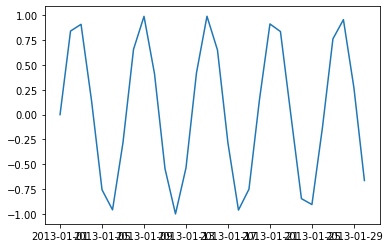

In [6]:
series.plot()

### Confidence Intervals

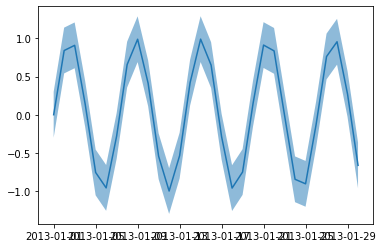

In [7]:
pdseries_low = pd.Series(np.sin(range(30)) - 0.3, index=pd.date_range('20130101', '20130130'))
pdseries_up = pd.Series(np.sin(range(30)) + 0.3, index=pd.date_range('20130101', '20130130'))

series_conf = TimeSeries(pdseries, pdseries_low, pdseries_up)

series_conf.plot()

### Drop, Slice, split

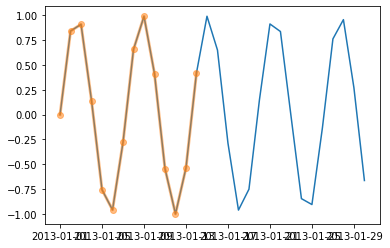

In [8]:
# Drop end:
series.plot()
beginning = series.drop_end(pd.Timestamp('20130115'))
beginning.plot(marker='o', lw=3, alpha=0.5)

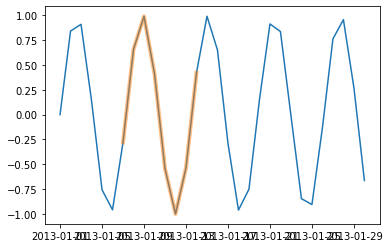

In [9]:
# Slice
subseries = series.slice(pd.Timestamp('20130107'), pd.Timestamp('20130114'))
series.plot()
subseries.plot(lw=4, alpha=0.5)

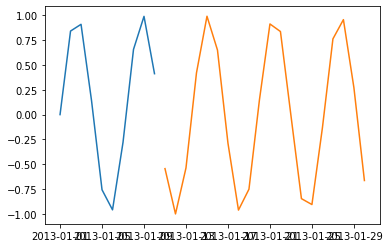

In [10]:
# Split
s1, s2 = series.split_after(pd.Timestamp('20130110'))
s1.plot()
s2.plot()

### Intersect (in time)

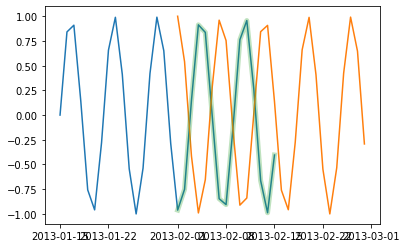

In [11]:
series1 = TimeSeries(pd.Series(np.sin(range(32)), index=pd.date_range('20130115', '20130215')))
series2 = TimeSeries(pd.Series(np.cos(range(28)), index=pd.date_range('20130201', '20130228')))

series1.plot()
series2.plot()

series1.intersect(series2).plot(lw=5, alpha=0.3)

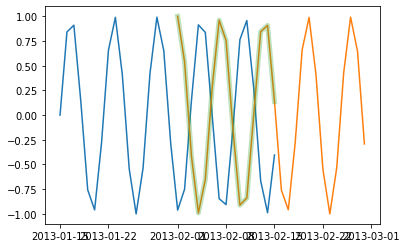

In [12]:
series1.plot()
series2.plot()

series2.intersect(series1).plot(lw=5, alpha=0.3)

# Auto-regressive Models

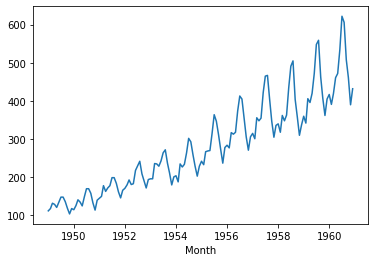

In [14]:
df = pd.read_csv('AirPassengers.csv')
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
series.plot()

In [15]:
from u8timeseries import ExponentialSmoothing

train, val = series.split_after(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
pred_val = model.predict(len(val))

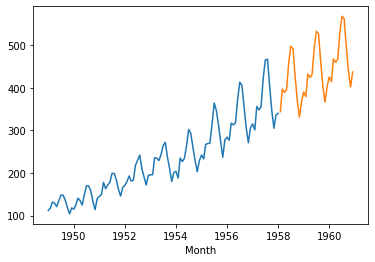

In [16]:
train.plot()
pred_val.plot()

### Backtesting

In [17]:
from u8timeseries.backtesting import simulate_forecast_ar

historical_fcast = simulate_forecast_ar(series, model, pd.Timestamp('19570601'), fcast_horizon_n=6, verbose=True)

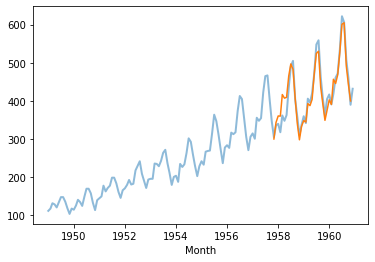

In [18]:
series.plot(lw=2, alpha=0.5)
historical_fcast.plot()

In [19]:
from u8timeseries.metrics import mape, mase

mape(series.intersect(historical_fcast), historical_fcast)

4.458009164345474